<a href="https://colab.research.google.com/github/arpitsharma27/PythonPractice/blob/main/UniversityOf_Michigan_Week2_NHANES_UnivariateAnalyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
url="https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df=pd.read_csv(url)

In [ ]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [ ]:
df.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,1.487881,126.236617,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,0.499897,4.244406,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,1.000000,119.000000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.000000,126.000000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,2.000000,130.000000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [ ]:
print(sorted(df))
print(list(df.columns))

['ALQ101', 'ALQ110', 'ALQ130', 'BMXARMC', 'BMXARML', 'BMXBMI', 'BMXHT', 'BMXLEG', 'BMXWAIST', 'BMXWT', 'BPXDI1', 'BPXDI2', 'BPXSY1', 'BPXSY2', 'DMDCITZN', 'DMDEDUC2', 'DMDHHSIZ', 'DMDMARTL', 'HIQ210', 'INDFMPIR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'SDMVPSU', 'SDMVSTRA', 'SEQN', 'SMQ020', 'WTINT2YR']
['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210']


**Frequency Counts**

In [ ]:
df.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [ ]:
##alternate methods for frequencies across multiple columns
#1-
#df[['DMDEDUC2','DMDMARTL','ALQ130']].value_counts(sort=False)
#2-
pd.crosstab(df.DMDEDUC2,df.DMDMARTL , normalize=True)

DMDMARTL,1.0,2.0,3.0,4.0,5.0,6.0,77.0
DMDEDUC2,,,,,,,
1.0,0.062294,0.016076,0.009499,0.007855,0.011874,0.012057,0.000000
2.0,0.055718,0.007307,0.011326,0.007125,0.021374,0.014615,0.000000
3.0,0.100475,0.018085,0.023201,0.007307,0.043296,0.024297,0.000000
4.0,0.138290,0.019730,0.039642,0.007673,0.060650,0.029777,0.000365
5.0,0.151078,0.010778,0.021922,0.004019,0.046218,0.015528,0.000000
9.0,0.000000,0.000365,0.000183,0.000000,0.000000,0.000000,0.000000


In [ ]:
df['DMDEDUC2'].value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [ ]:
df['DMDEDUC2'].value_counts().sum()

5474

In [ ]:
#To find total values that are missing:
pd.isnull(df.DMDEDUC2).sum()

261

In [ ]:
#Create a new column with different values
df['DMDEDUC2x']=df.DMDEDUC2.replace({1:"<9" ,2:"9-11" ,3:"HS/GED" ,4:"Some College/AA" ,5:"College" ,6:"Refused" ,7:"Don't Know"})
df[['DMDEDUC2x']].value_counts()

DMDEDUC2x      
Some College/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
9.0                   3
dtype: int64

In [ ]:
x=df[['DMDEDUC2x']].value_counts()
x/x.sum()

DMDEDUC2x      
Some College/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
9.0                0.000548
dtype: float64

In [ ]:
df['RIAGENDRx']=df.RIAGENDR.replace({1:'Male' ,2:'Female'})
df['RIAGENDRx'].value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [ ]:
y=df['RIAGENDRx'].value_counts()
y/y.sum()

Female    0.518919
Male      0.481081
Name: RIAGENDRx, dtype: float64

**Numerical Summaries**

A quick way to get a set of numerical summaries for a quantitative variable is with the describe data frame method. Below we demonstrate how to dp this using the body weight variable-BMXWT. As with many surveys some data values are missing, so we explicitly drop the missing cases using the **dropna** method before generating the summaries. 

In [ ]:
df['BMXWT'].value_counts(bins=5)

(65.7, 99.0]                  3249
(32.233000000000004, 65.7]    1391
(99.0, 132.3]                  861
(132.3, 165.6]                 146
(165.6, 198.9]                  19
Name: BMXWT, dtype: int64

In [ ]:
df.BMXWT.isnull().sum()

69

In [ ]:
df.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [ ]:
df.BMXWT.describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [ ]:
x=df.BMXWT.dropna()

In [ ]:
print(x.mean()) ##Pandas Method
print(np.mean(x)) ##Numpy Method

81.34267560889509
81.34267560889509


In [ ]:
print(x.median())
print(np.median(x))

78.2
78.2


In [ ]:
print(x.quantile(0.5))
print(np.percentile(x,50))

78.2
78.2


In [ ]:
print(x.quantile(0.82))
print(np.percentile(x,82))

print(x.quantile(0.99))
print(np.percentile(x,99))

99.1
99.1
147.67000000000007
147.67000000000007


In [ ]:
#Find alternative way to do this using pandas
np.mean((df.BPXSY1>=120)&(df.BPXSY2<=139))

0.3741935483870968

In [ ]:
np.sum((df.BPXSY1>=120)&(df.BPXSY1<=139))

2104

In [ ]:
#Proportion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.
np.mean((df.BPXDI1 >= 80 ) & (df.BPXDI2 <= 89))

0.14803836094158676

Now we calculate proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure. Since some people are pre-hypertensive under both criteria, the proportion below is less than the sume of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine tehm with a "logical or" to obtain the final status for each subject.

In [ ]:
a=(df.BPXSY1 >= 120) & (df.BPXSY2 <=139)
print(a.value_counts())
b=(df.BPXDI1 >= 80) & (df.BPXDI2 <= 89)
print(b.value_counts())

print(np.mean(a|b))

False    3589
True     2146
dtype: int64
False    4886
True      849
dtype: int64
0.43975588491717527


In [ ]:
print(np.mean(df.BPXSY1 -  df.BPXSY2))
print(np.mean(df.BPXDI1 - df.BPXDI2))

0.6749860309182343
0.3490407897187558


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


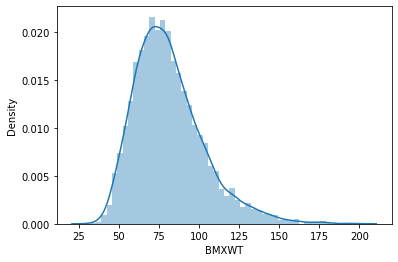

In [ ]:
sns.distplot(df.BMXWT.dropna())
plt.show()

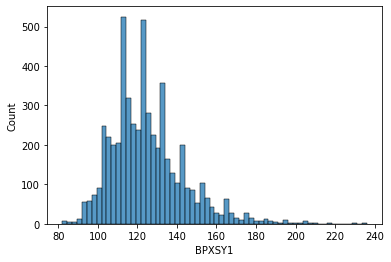

In [ ]:
#Next we look at the histogram of systolic blood pressue measurements. You can see that there is a tendency for the measurements to be rounded to the nearest 5 to 10 units.
sns.histplot(df.BPXSY1.dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


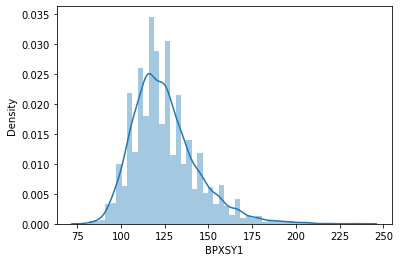

In [ ]:
sns.distplot(df.BPXSY1.dropna())
plt.show()

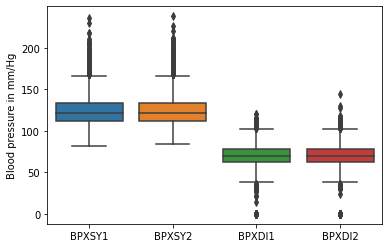

In [ ]:
bp=sns.boxplot(data=df.loc[:,["BPXSY1","BPXSY2","BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

**Stratification**

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own. We can then formally or informally compare the findings in the different strata. 

When working with human subjects, it is very common to stratify on demographic factors such as age, sex and race. 

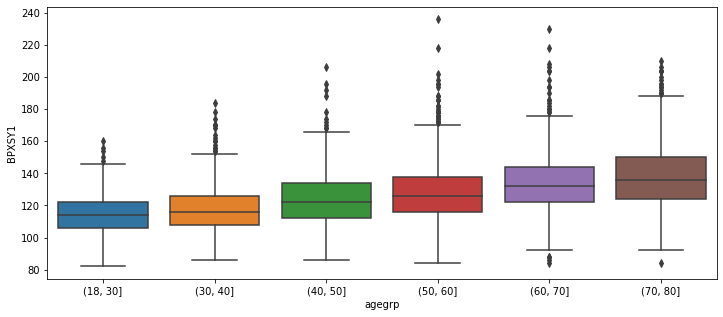

In [ ]:
df["agegrp"]=pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70,80])
plt.figure(figsize=(12, 5))
sns.boxplot(x='agegrp' , y='BPXSY1', data=df)

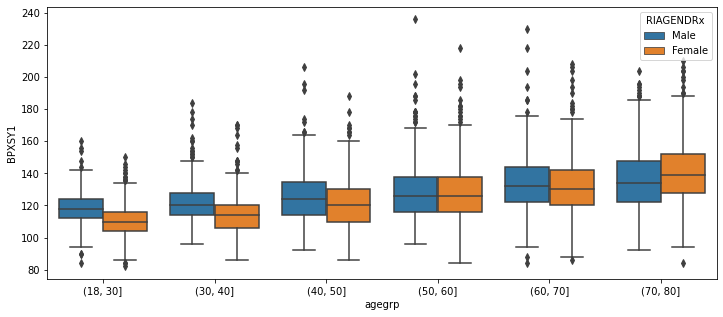

In [ ]:
df["agegrp"]=pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70,80])
plt.figure(figsize=(12, 5))
sns.boxplot(x='agegrp' , y='BPXSY1',hue='RIAGENDRx', data=df)

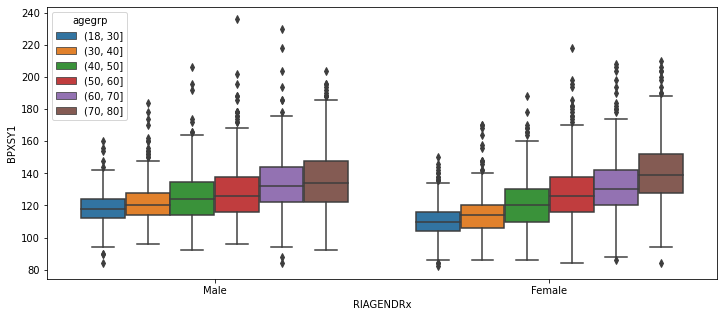

In [ ]:
df["agegrp"]=pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70,80])
plt.figure(figsize=(12, 5))
sns.boxplot(x='RIAGENDRx' , y='BPXSY1',hue='agegrp', data=df)

**Note on Causality and Confounding:**

An important role of statistics is to aid researchers in identifying causes underlying observed differences. Here we have seen differences in both blood pressure and educational attainment based on age. It is plausible that agin directly causes blood pressure to increase. But in the case of educational attainment, this is actually a "birth cohort effect".

In [ ]:
df.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some College/AA    364
          College            278
          HS/GED             237
          9-11                99
          <9                  47
(30, 40]  Some College/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some College/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some College/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some College/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some College/AA    217
          HS/GED             184
          <9                 164
          College            156
          9-11   

In [ ]:
dx=df.loc[~df.DMDEDUC2x.isin(["Don't Know", "Missing"]),:] #Eliminate Rare Missing Values
dx=dx.groupby(["agegrp","RIAGENDRx"])["DMDEDUC2x"]
dx=dx.value_counts()
print()
print(dx)
dx=dx.unstack()
print()
print(dx)
print()
dx=dx.apply(lambda x: x/x.sum(),axis=1)#Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))#Limit display to 3 decimal places


agegrp    RIAGENDRx  DMDEDUC2x      
(18, 30]  Female     Some College/AA    207
                     College            156
                     HS/GED             119
                     9-11                44
                     <9                  27
                                       ... 
(70, 80]  Male       College             95
                     HS/GED              86
                     <9                  72
                     9-11                45
                     9.0                  2
Name: DMDEDUC2x, Length: 62, dtype: int64

DMDEDUC2x           9.0  9-11    <9  College  HS/GED  Some College/AA
agegrp   RIAGENDRx                                                   
(18, 30] Female     NaN  44.0  27.0    156.0   119.0            207.0
         Male       NaN  55.0  20.0    122.0   118.0            157.0
(30, 40] Female     NaN  42.0  46.0    149.0    78.0            159.0
         Male       NaN  69.0  47.0    115.0   104.0            123.0
(40, 50] Female

In [ ]:
print(df.BPXSY2.median())

122.0


In [ ]:
print(df.BPXSY2.mean())

124.78301716350497


In [ ]:
print(df.BPXSY2.std())

18.527011720295047


In [ ]:
print(df.BPXSY2.max())

238.0


In [ ]:
print(df.BPXSY2.quantile(0.25))
print(df.BPXSY2.quantile(0.75))

print(df.BPXSY2.quantile(0.75) -df.BPXSY2.quantile(0.25))

112.0
134.0
22.0


In [ ]:
df.BPXSY2.describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


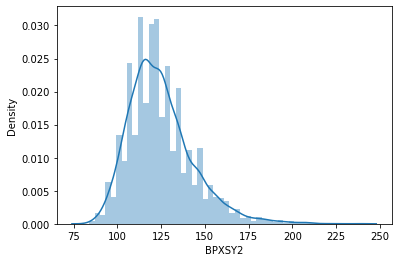

In [ ]:
sns.distplot(df.BPXSY2)

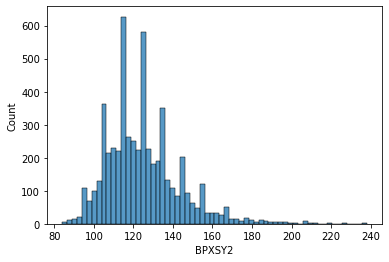

In [ ]:
sns.histplot(df.BPXSY2)

In [ ]:
df.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x,RIAGENDRx,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,College,Male,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,HS/GED,Male,"(50, 60]"
